# ANOVA (Analysis Of Variance)

ANOVA, üç veya daha çok kitlenin ortalamaları arasında farklılık olup olmadığını test etmek için kullanılan bir yöntemdir. Amacı, gruplar arasındaki farklılıkları ve bu farklılıkların anlamlılığını değerlendirmektir. 

ANOVA kabaca şöyle bir yol izler:

+ 1-) $H_0$ ve $H_1$ hipotezleri kurulur. 


+ 2-) Karşılaştırma yapılacak olan gruplar, ANOVA şartlarını sağlıyor mu kontrol edilir. Bu şartlar şunlardır: 

    **Normallik şartı:** Örneklemlerin çekildiği kitleler normal dağılıma sahip olmalıdır. Bu şart **Shapiro Wilk** testi ile test edilir. Eğer bu şart sağlanmazsa; **Kruskal Wallis H-Testi** yapılır. Bu test sonucunda, gruplar arasında bir fark tespit edilirse **Dunn Post - Hoc** testi ile farklılık yaratan grup tespit edilir.
    
    **Eşit varyanslılık:** Örneklemlerin çekildiği kitlelerin varyansları eşit olmalıdır. Bu şart **Levene** ya da **Bartlett** testi ile test edilir. Eğer bu şart sağlanmazsa; **Welch's F-Testi** ya da **Brown Forsyhte Testi** yapılır. Bu test sonucunda, gruplar arasında bir fark tespit edilirse **Games Howell Post - Hoc** testi ile farklılık yaratan grup tespit edilir.
    
    **Bağımsızlık:** Örneklemlerin çekildiği kitleler birbirlerinden bağımsız olmalıdır.


+ 3-) Eğer yukarıda bahsedilen bütün şartlar sağlanırsa; **ANOVA testi** uygulanır. Eğer gruplar arası bir fark tespit edilirse **Tukey Post - Hoc** testi ile farklılık yaratan grup tespit edilir. 


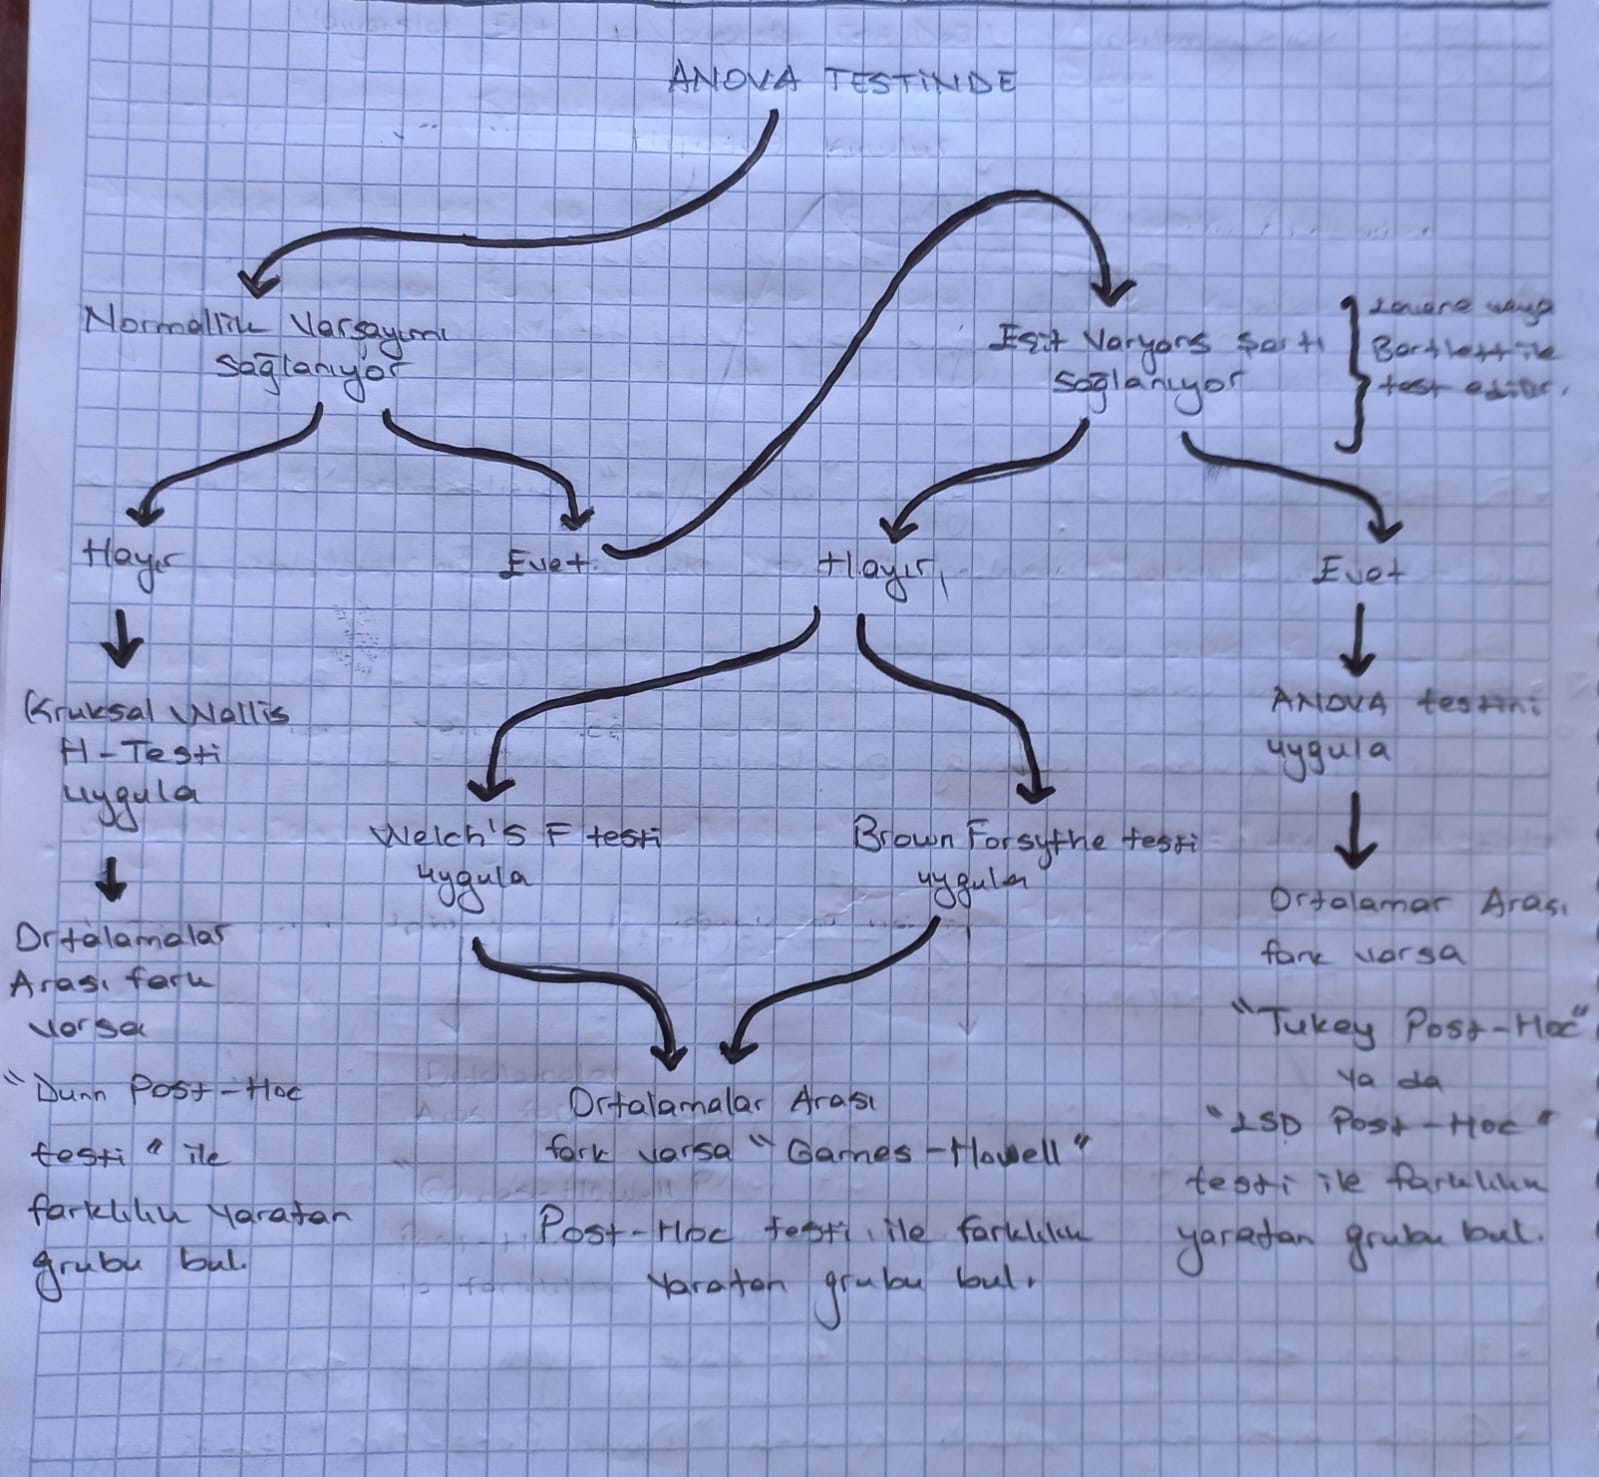



Bu dosya içerisinde, bu testlerin formüllerine değinmeyeceğim. Sadece Python'da `scipy` ve `pingouin` kütüphanelerini kullanarak nasıl hesaplayabileceğimizi göstereceğim.

## Post - Hoc (Çoklu Karşılaştırmalar)

Yukarıda bahsedilen Post - Hoc testleri, tek yönlü varyans analizinde ortalamalar arasında fark tespit edildiğinde, farkı yaratan grubun hangisi olduğunu tespit etmek için kullanılan testlerdir. Şartların sağlanıp sağlanmamasına göre kullanılabilecek olan birçok Post - Hoc testi vardır. 

## Örnek

Bir iş sınavına giren üç farklı bölüm mezunlarının iş sınavında farklı aşamalardan aldıkları toplam başarı puanları bölümlere göre karşılaştırılmak isteniyor. Bu nedenle her bölümden mezun rastgele beş mezun rastgele seçilerek toplam başarı notu kaydediliyor. Bölümlere göre puanlar açısından farklılık var mıdır? 95% güven düzeyinde test edin.


### Hipotezi Kuralım

$H_0: \mu_F = \mu_K = \mu_M$

$H_1:$ En az biri farklıdır

### Sorudaki Veri Setini Ayarlayalım

In [1]:
import pandas as pd
data = {'Fizik': [65, 75, 70, 70, 80, 86, 70, 71, 73, 88], 
        'Kimya': [52, 72, 65, 61, 53, 65, 63, 62, 62, 59], 
        'Matematik': [60, 73, 66, 62, 60, 71, 64, 63, 65, 58]}
    
ders_notları = pd.DataFrame(data) 
ders_notları

,Fizik,Kimya,Matematik
0,65,52,60
1,75,72,73
2,70,65,66
3,70,61,62
4,80,53,60
5,86,65,71
6,70,63,64
7,71,62,63
8,73,62,65
9,88,59,58


In [2]:
ders_notları_melt = pd.melt(ders_notları, var_name='Ders', value_name='Not')
ders_notları_melt

,Ders,Not
0,Fizik,65
1,Fizik,75
2,Fizik,70
3,Fizik,70
4,Fizik,80
5,Fizik,86
6,Fizik,70
7,Fizik,71
8,Fizik,73
9,Fizik,88


### Normallik Şartı İçin: Shapiro Wilk Testi

Shapiro Wilk normallik testi sonucu elde edilen P değeri, a'dan (0.05) büyükse; gruptaki veri normal dağılıma sahiptir. 

In [3]:
#Fizik dersindeki notlar normal dağılıma sahip mi? 
import scipy.stats
scipy.stats.shapiro(ders_notları["Fizik"])

ShapiroResult(statistic=0.8900005221366882, pvalue=0.1695786565542221)

In [4]:
#Kimya dersindeki notlar normal dağılıma sahip mi? 
import scipy.stats
scipy.stats.shapiro(ders_notları["Kimya"])

ShapiroResult(statistic=0.9380710124969482, pvalue=0.531755805015564)

In [5]:
#Matematik dersindeki notlar normal dağılıma sahip mi?
import scipy.stats
scipy.stats.shapiro(ders_notları["Matematik"])

ShapiroResult(statistic=0.933222770690918, pvalue=0.48032957315444946)

+ Üç dersin notlarından alınan örneklemler normal dağılıma sahip. Normallik şartı sağlandığına göre Eşit varyanslılık şartına geçebiliriz.

### Eşit Varyanslılık Şartı İçin: Levene veya Bartlett Testi

Testler sonucu elde edilen P değeri, a'dan (0.05) büyükse; gruplar eşit varyansa sahiptir.

In [6]:
#Levene Testi 
import scipy.stats
scipy.stats.levene(ders_notları["Fizik"], ders_notları["Kimya"], ders_notları["Matematik"], center = "mean")

LeveneResult(statistic=1.105925537493444, pvalue=0.3454325547263218)

In [7]:
#Bartlett Testi 
import scipy.stats
scipy.stats.bartlett(ders_notları["Fizik"], ders_notları["Kimya"], ders_notları["Matematik"])

BartlettResult(statistic=1.7433885206490682, pvalue=0.4182423372243934)

+ P değerleri her iki testte de a'dan büyük geldiği için üç dersin de notlarının alındığı kitlelerin varyansları eşit. Şartlar sağlandığına göre artık ANOVA testine geçebiliriz. Bakalım ders notlarının ortalamaları birbirlerine eşit mi?

### ANOVA Testi

Test sonucu elde edilen P değeri, a'dan (0.05) büyükse; grupların ortalamaları eşittir. Eğer küçükse farklılık var demektir. 

In [8]:
import scipy.stats
scipy.stats.f_oneway(ders_notları["Fizik"], ders_notları["Kimya"], ders_notları["Matematik"])

F_onewayResult(statistic=13.178194607268463, pvalue=0.00010148316082756144)

+ P değeri, a'dan küçük olduğu için grupların ortalamaları arasında fark vardır, yani $H_0$ hipotezi reddedilir. Bu farkın hangi gruptan kaynaklandığını görebilmek için Tukey Post - Hoc testini uygulayalım.

### Tukey Post - Hoc Testi 

Tukey Post - Hoc testine veri setini verirken `long` formatta vermeliyiz. Bu yüzden yukarıda ayrıca bir `ders_notları_melt` isminde, long formatta veri seti oluşturduk. 

In [9]:
from statsmodels.stats import multicomp
print(multicomp.pairwise_tukeyhsd(endog = ders_notları_melt["Not"],
                                             groups = ders_notları_melt["Ders"],
                                             alpha = 0.05))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
 Fizik     Kimya    -13.4 0.0001 -20.2273 -6.5727   True
 Fizik Matematik    -10.6 0.0018 -17.4273 -3.7727   True
 Kimya Matematik      2.8 0.5728  -4.0273  9.6273  False
--------------------------------------------------------


+ Fizik ve Kimya bölümlerinin ortalamaları arasındaki ve Fizik ve Matematik bölümlerinin arasındaki ortalamalar arasında bir farklılık yokken Kimya ve Matematik bölümlerinin arasında farklılık vardır.

## Örnek

A = [64, 66, 68, 75, 78, 94, 98, 79, 71, 80]

B = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]

C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81] bu üç grup arasında a = 0.05 olacak şekilde ANOVA uygulayalım.

### Hipotezi Kuralım

$H_0: \mu_A = \mu_B = \mu_C$

$H_1:$ En az biri farklıdır

### Sorudaki Veri Setini Ayarlayalım

In [10]:
import pandas as pd 

A = [64, 66, 68, 75, 78, 94, 98, 79, 71, 80]
B = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]
C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

df = pd.DataFrame({"A" : A, "B" : B, "C" : C})
df

,A,B,C
0,64,91,79
1,66,92,78
2,68,93,88
3,75,90,94
4,78,97,92
5,94,94,85
6,98,82,83
7,79,88,85
8,71,95,82
9,80,96,81


In [11]:
df_melt = pd.melt(df, var_name = "Categories", value_name = "Values")
df_melt

,Categories,Values
0,A,64
1,A,66
2,A,68
3,A,75
4,A,78
5,A,94
6,A,98
7,A,79
8,A,71
9,A,80


### Normallik Şartı İçin: Shapiro Wilk Testi

In [12]:
import scipy.stats
scipy.stats.shapiro(df["A"])

ShapiroResult(statistic=0.9091562628746033, pvalue=0.27524569630622864)

In [13]:
import scipy.stats
scipy.stats.shapiro(df["B"])

ShapiroResult(statistic=0.9210680723190308, pvalue=0.3659495711326599)

In [14]:
import scipy.stats
scipy.stats.shapiro(df["C"])

ShapiroResult(statistic=0.9413535594940186, pvalue=0.5681711435317993)

+ Normallik şartı sağlandı. Eşit varyanslılık şartına bakalım.

### Eşit Varyanslılık Şartı İçin: Levene ve Bartlett Testi

In [15]:
import scipy.stats
scipy.stats.levene(df["A"], df["B"], df["C"])

LeveneResult(statistic=3.5895867768595044, pvalue=0.041460047176640494)

In [16]:
import scipy.stats
scipy.stats.bartlett(df["A"], df["B"], df["C"])

BartlettResult(statistic=9.039674395996965, pvalue=0.010890796567714111)

+ Levene ve Bartlett testlerinden elde edilen P değeri, a'dan (0.05) küçük olduğu için varyansların eşit olmadığı sonucuna ulaştık. Bu yüzden Welch's F-Testi'ni uygulayacağız.

### Welch's F Testi 

In [17]:
import pingouin
pingouin.welch_anova(dv = "Values", between = "Categories", data = df_melt)

,Source,ddof1,ddof2,F,p-unc,np2
0,Categories,2,16.651295,9.717185,0.001598,0.399286


+ Elde edilen P değeri, a'dan (0.05) küçük olduğu için $H_0$ hipotezi reddedilir. Yani grupların ortalamaları arasında farklılık vardır. Bu farka hangi grup sebebiyet veriyor, bunu görebilmek için Games Howell Post - Hoc testini uygulayalım.

### Games Howell Post - Hoc Testi 

In [18]:
import pingouin
pingouin.pairwise_gameshowell(dv = "Values", between = "Categories", data = df_melt)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,77.3,91.8,-14.5,3.843754,-3.772354,11.676788,0.007246,-1.615764
1,A,C,77.3,84.7,-7.4,3.952777,-1.872102,12.752827,0.186659,-0.801853
2,B,C,91.8,84.7,7.1,2.179959,3.256942,17.441992,0.011940,1.395004


+ P değerlerinden, A ve B grupları arasındaki ve B ve C grupları arasındaki farkın A ve C grupları arasındaki farka nazaran önemli ölçüde farklı olduğunu görebiliriz.

## Örnek

A = [40.2, 39.4, 48.3, 36.6, 35.8, 40.1, 39.5]

B = [38.3, 36.7, 39.8, 30.7, 35.7, 38.2]

C = [39.9, 41.3, 40.6, 46.4, 46.9, 48.4, 45.3] bu üç grup arasında a = 0.05 olacak şekilde ANOVA uygulayalım.

### Hipotezi Kuralım 

$H_0: \mu_A = \mu_B = \mu_C$

$H_1:$ En az biri farklıdır

### Sorudaki Veri Setini Ayarlayalım

In [19]:
import pandas as pd

A = [40.2, 39.4, 48.3, 36.6, 35.8, 40.1, 39.5]
B = [38.3, 36.7, 39.8, 30.7, 35.7, 38.2]
C = [39.9, 41.3, 40.6, 46.4, 46.9, 48.4, 45.3]

data = pd.concat([pd.Series(A), pd.Series(B), pd.Series(C)], axis = 1).fillna(0)
data.columns = ["A", "B", "C"]
data

,A,B,C
0,40.2,38.3,39.9
1,39.4,36.7,41.3
2,48.3,39.8,40.6
3,36.6,30.7,46.4
4,35.8,35.7,46.9
5,40.1,38.2,48.4
6,39.5,0.0,45.3


In [20]:
data_melt = pd.melt(data, var_name = "Categoires", value_name = "Values")
data_melt

,Categoires,Values
0,A,40.2
1,A,39.4
2,A,48.3
3,A,36.6
4,A,35.8
5,A,40.1
6,A,39.5
7,B,38.3
8,B,36.7
9,B,39.8


### Normallik Şartı İçin: Shapiro Wilk Testi

In [21]:
import scipy.stats
scipy.stats.shapiro(data["A"])

ShapiroResult(statistic=0.8163490295410156, pvalue=0.059212345629930496)

In [22]:
import scipy.stats
scipy.stats.shapiro(data["B"])

ShapiroResult(statistic=0.6295205354690552, pvalue=0.0006003506132401526)

In [23]:
import scipy.stats
scipy.stats.shapiro(data["C"])

ShapiroResult(statistic=0.8872698545455933, pvalue=0.26072239875793457)

+ Elde edilen sonuçlarda B kitlesi normal dağılıma sahip olmadığı için normallik şartı sağlanamadı. Bu yüzden Kruskal Wallis H-Testi'ni uygulayacağız.

### Kruskal Wallis H-Testi

In [24]:
import scipy.stats
scipy.stats.kruskal(data["A"], data["B"], data["C"])

KruskalResult(statistic=11.896103896103895, pvalue=0.0026109217787793717)

+ Elde edilen P değeri, a'dan (0.05) küçük olduğu için $H_0$ hipotezi reddedilir. Yani grupların ortalamaları arasında fark vardır. Bu farklılığı hangi grubun yarattığını bulabilmek için Dunn Post - Hoc testini uygulayacağız.

### Dunn Post - Hoc Testi

In [25]:
import scikit_posthocs
scikit_posthocs.posthoc_dunn([A, B, C], )

,1,2,3
1,1.000000,0.167074,0.052072
2,0.167074,1.000000,0.001162
3,0.052072,0.001162,1.000000


+ Tablodaki değerler P değerleridir. 1 = A, 2 = B ve 3 = C kategorilerini temsil eder. A-B = 0.167, A-C = 0.052, B-C = 0.001 değerlerine sahiptir. Görüleceği üzere B-C grupları arasında farklılık.

## Örnek

İçe aktaracağımı Red Wine Quality veri seti üzerinde a = 0.05 olacak şekilde ANOVA yapalım.

In [26]:
import os

os.chdir("C:\\Users\\ozero\\ÖNEMLİ ÇALIŞMALAR")

In [27]:
import pandas as pd
red_wine = pd.read_csv("winequality-red.csv")

In [28]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
red_wine.shape

(1599, 12)

+ `volatile acidity`, `citric acid` ve `sulphates` sütunları arasında ANOVA testini uygulayalım.

### Veri Setini Düzenleyelim

In [30]:
red_wine_df = red_wine[["volatile acidity", "citric acid", "sulphates"]]
red_wine_df.head(5)

,volatile acidity,citric acid,sulphates
0,0.70,0.00,0.56
1,0.88,0.00,0.68
2,0.76,0.04,0.65
3,0.28,0.56,0.58
4,0.70,0.00,0.56


In [31]:
red_wine_df.isna().sum()

volatile acidity    0
citric acid         0
sulphates           0
dtype: int64

In [32]:
red_wine_df.shape

(1599, 3)

In [33]:
red_wine_melt = pd.melt(red_wine_df, var_name = "Categories", value_name = "Values")
red_wine_melt

,Categories,Values
0,volatile acidity,0.70
1,volatile acidity,0.88
2,volatile acidity,0.76
3,volatile acidity,0.28
4,volatile acidity,0.70
...,...,...
4792,sulphates,0.58
4793,sulphates,0.76
4794,sulphates,0.75
4795,sulphates,0.71


### Normallik Şartı İçin: Shapiro Wilk Testi

In [34]:
import scipy.stats
print(scipy.stats.shapiro(red_wine_df["volatile acidity"]))

ShapiroResult(statistic=0.9743338823318481, pvalue=2.686385373947307e-16)


In [35]:
import scipy.stats 
print(scipy.stats.shapiro(red_wine_df["citric acid"]))

ShapiroResult(statistic=0.955294668674469, pvalue=1.0233944777578548e-21)


In [36]:
import scipy.stats 
print(scipy.stats.shapiro(red_wine_df["sulphates"]))

ShapiroResult(statistic=0.8330425024032593, pvalue=5.821617678881608e-38)


+ P değerleri, a'dan (0.05) büyük olduğu için normallik şartı sağlanmış demektir. Varyans eşitliğine bakalım.

### Varyans Eşitliği Şartı İçin: Levene Testi

In [37]:
import scipy.stats
scipy.stats.levene(red_wine_df["volatile acidity"], red_wine_df["citric acid"], red_wine_df["sulphates"])

LeveneResult(statistic=74.16372214735442, pvalue=1.9025447366998684e-32)

+ P değeri a'dan büyük olduğuna göre 3 kitlenin varyansı eşit demektir. ANOVA testine geçebiliriz.

### ANOVA Testi

In [38]:
import scipy.stats
scipy.stats.f_oneway(red_wine_df["volatile acidity"], red_wine_df["citric acid"], red_wine_df["sulphates"])

F_onewayResult(statistic=1885.408278449512, pvalue=0.0)

+ P değeri, a'dan küçük olduğu için grupların ortalamaları arasında fark vardır. Hangi grubun farklılık yarattığını görmek için Tukey Post - Hoc testini kullanalım

### Tukey Post - Hoc Testi

In [39]:
from statsmodels.stats import multicomp
print(multicomp.pairwise_tukeyhsd(endog = red_wine_melt["Values"],
                                             groups = red_wine_melt["Categories"],
                                             alpha = 0.05))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------
citric acid        sulphates   0.3872   0.0  0.3721  0.4022   True
citric acid volatile acidity   0.2568   0.0  0.2418  0.2719   True
  sulphates volatile acidity  -0.1303   0.0 -0.1454 -0.1153   True
------------------------------------------------------------------


+ Bruh